# Module 2 Ungraded Lab 2: Posterior Predictive Distribution

Ungraded labs are designed to give learners an opportunity to apply theoretical material presented in previous videos. The goals of this ungraded lab are to (1) introduce the posterior predictive distribution, (2) estimate the posterior predictive distribution using Monte Carlo simulation, and (3) compare that estimate to the true posterior predictive distribution.  Unlike previous ungraded labs, the answers to this ungraded lab are given in the code below. Ungraded labs can be completed when assigned or in conjunction with upcoming videos. Answers to the lab will be reviewed in upcoming videos.

**NOTE**: The problem presented below builds on the problem from the ungraded labs in Module 1.  Please have those ungraded labs available when viewing the video covering this ungraded lab.

### Problem #3: Posterior predictive distribution simulation

Let's continue with the setup from problem #1:

Suppose health researches are studying the prevalence of a particular disease, $D$. If the percentage of people infected by $D$ in the population, $p$, is greater than 0.5, certain policies will be set to stop the spread of $D$. Researchers let $\alpha = 0.05$, and collected the following data, where `1` = "doesn't have $D$" and `0` = "does have $D$".
$$ 0, \, 0, \, 1,\, 0,\, 0, \, 0,\,  0,\,  1,\,  0,\,  0, \, 0, \, 1$$

If the sampling distribution for $X$ is Binomial$(n, p)$ with $n$ known, and the prior distribution is $beta(\alpha, \beta)$, then, as mentioned above, the posterior distribution for $p$ is $beta(\alpha + n\bar{x}, \beta + n – n\bar{x})$.

Suppose that we want to predict $\mathbf{X^*} = $ the number of individuals that do not have $D$ (i.e., the number of `1`s) among the next $n^*$ tests. For example, we might ask: What is the probability that, if we test $n^* = 10$ people, $\mathbf{X^*} = 3$ test negative for $D$. In class, we saw that the posterior predictive distribution is given by:

\begin{align*}
f(x^* \, | \, \mathbf{x}) = \int f(x^* \, | \, p)\pi(p \, | \, \mathbf{x})dp.
\end{align*}

It's not always easy to compute this integral (I don't want to do it!). In *Bayesian Statistical Methods*, Reich and Ghosh (page 31) give us a method for estimating the posterior predictive distribution:

1. draw a posterior sample: $p^* \sim \pi(p \, | \, \mathbf{x})$. That is, generate a random number from the posterior.

2. then generate a random number from the likelihood function, with parameter $p^*$: $x^* \, | \, p^* \sim f(\mathbf{x} \, | \, p^*)$ 

3. repeat 1-2 $m$ (many) times.

The values of $x^*$ will follow the posterior predictive distribution.

First, we code the data, and the posterior parameters $A$ and $B$.

In [1]:
x = c(0,0,1,0,0,0,0,1,0,0,0,1); n = length(x); 

alpha = 1; beta = 1; #parameters for a beta(1,1) = uniform(0,1)

A = alpha + n*mean(x) #posterior "alpha"
B =  beta + n - n*mean(x) #posterior "beta"

m = 500000 #"many times", as given in step 3 above

Next, we sample from the posterior (first line in the loop) and use the sample to create a predicted value (second line in the loop). 

In [2]:
pred_sim = matrix(NA, nrow = m) #initializing vector of simulated predictions
n_star = 10; x_star = 0:n_star #fixing the number of future trials and possible values for x^*

for (i in 1:m){
    p_star = rbeta(1, A, B); #draw a posterior sample
    pred_sim[i] = rbinom(1, n_star, p_star) #prediction from the likelihood
}


In [3]:
head(pred_sim)

8
5
5
6
3
1


Then, we calculate the relative frequency of predicted values (e.g., what proportion of predicted values were 0? 1? ...). These relative frequencies are our estimated/simulated posterior predictive distribution. Finally, we plot these relative frequencies. 

In [3]:
#ppd_sim = matrix(0,ncol = n_star)
ppd_sim = tabulate(as.factor(pred_sim))/m #count up the number of x^* values in each category and divide by m

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


x_star,ppd_sim
0,0.080698
1,0.170686
2,0.212102
3,0.199596
4,0.152770
5,0.098466
6,0.052122
7,0.023478
8,0.007902
9,0.001940


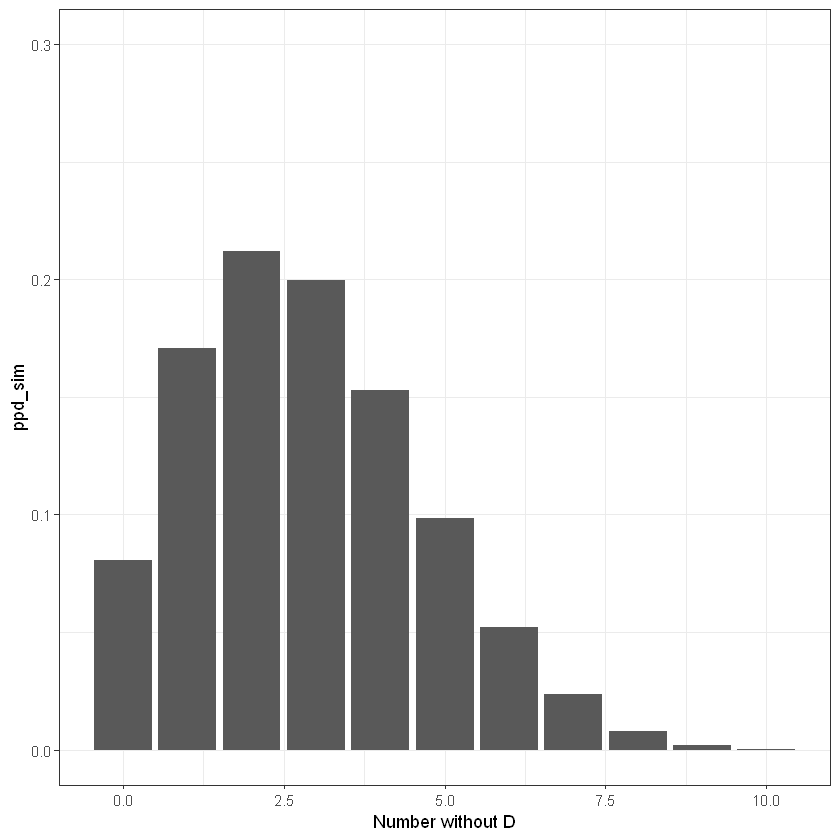

In [4]:
library(ggplot2)
df = data.frame(x_star, ppd_sim); df
ggplot(data=df, aes(x=x_star, y=ppd_sim)) +
  geom_bar(stat="identity") + 
    ylim(c(0,0.3)) + 
    xlab("Number without D") +
    theme_bw()

It turns out that the [true posterior predictive is beta-binomial](http://www.statslab.cam.ac.uk/Dept/People/djsteaching/ABS-lect3-4.pdf): 

\begin{align*}
f(x^* \, | \, \mathbf{x}) = \frac{\Gamma(A,B)}{\Gamma(A)\Gamma(B)} {n^* \choose x^* } \frac{\Gamma(A + x^*)\Gamma(B + n^* - x^*)}{\Gamma(A + B + n^*)}
\end{align*}

We can code that!

In [15]:
 ppd = gamma(A+B)/(gamma(A)*gamma(B))*choose(n_star, x_star)*
    gamma(A + x_star)*gamma(B + n_star - x_star)/gamma(A + B + n_star)

x_star,ppd
0,0.0807453416
1,0.1699901929
2,0.2124877411
3,0.1999884622
4,0.1531161664
5,0.0979943465
6,0.0524969713
7,0.0230755918
8,0.0079322347
9,0.0019229660


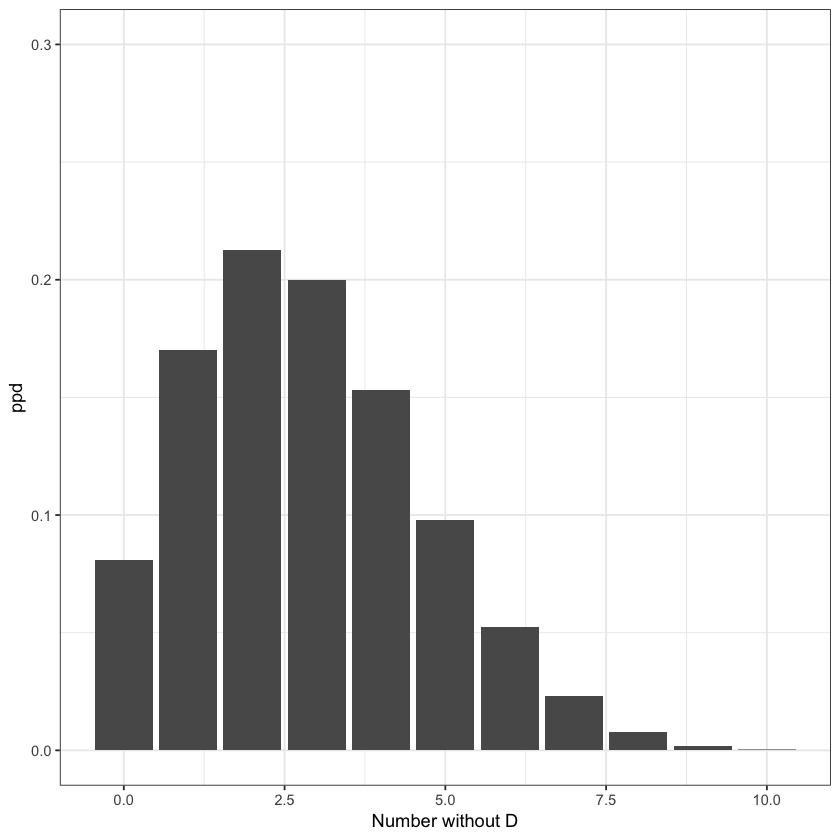

In [16]:
df$ppd = ppd
df[,c(1,3)]
ggplot(data=df, aes(x=x_star, y=ppd)) +
  geom_bar(stat="identity") + 
    ylim(c(0,0.3)) + 
    xlab("Number without D") +
    theme_bw()

That looks very similar to the simulated distribution. How similar? We can calculate the mean squared error, which should be small.

In [17]:
df; 
mean((ppd-ppd_sim)^2)

x_star,ppd_sim,ppd
0,0.081038,0.0807453416
1,0.170656,0.1699901929
2,0.211912,0.2124877411
3,0.200580,0.1999884622
4,0.152602,0.1531161664
5,0.097586,0.0979943465
6,0.052476,0.0524969713
7,0.022830,0.0230755918
8,0.008166,0.0079322347
9,0.001934,0.0019229660


[1] 1.598072e-07